In [ ]:
import numpy as np
from timeit import default_timer as timer

In [ ]:
def evalf(x):
  sum = 0
  for i in range(len(x)):
    sum += ((x[i]-1)**2 + (x[0]-x[i]**2)**2)
  return sum

In [ ]:
evalf(np.array([1,2,3]))

78

In [ ]:
def evalg(x):
  n = len(x)
  grad = np.array([2*(x[0]-1) + 2*(x[0]-x[0]**2)*(1-2*x[0])])
  grad[0] = sum(2*(x[0]-x[i]**2) for i in range(1,n))
  for i in range(1,n):
    grad = np.append(grad, (2*(x[i]-1) + 2*(x[0]-x[i]**2)*(-2*x[i])))
  
  return grad.reshape(n,1)

In [ ]:
def evalh(x):
  n = len(x)
  hes = np.zeros((n,n))
  hes[0][0] = 4 - 4*x[0] - 8*x[0] + 12*x[0]**2
  for i in range(1,n):
    hes[0][0] += 2
    hes[0][i] = -4*x[i]
  
  for i in range(1,n):
    hes[i][0] = -4*x[i]
    hes[i][i] = 2 - 4*x[0] + 12*x[i]**2
  
  return hes

In [ ]:
evalh(np.array([1,2,3]))

array([[  8.,  -8., -12.],
       [ -8.,  46.,   0.],
       [-12.,   0., 106.]])

In [ ]:
def compute_steplength_backtracking(x, gradf, B, alpha_start, rho, gamma):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*-np.matmul(B,gradf)) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-np.matmul(B,gradf)):
    alpha = rho*alpha

  return alpha

In [ ]:
def BFGS(n, tol, *args):
  x1 = np.zeros(n).reshape(n,1)
  grad_f = evalg(x1)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  I = np.identity(n)

  s = alpha*np.ones(n)

  print(np.linalg.norm(s)/np.linalg.norm(grad_f))

  B = I/n

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 3000:
    alpha = compute_steplength_backtracking(x1, grad_f, B, alpha, rho, gamma)
    x2 = np.add(x1, np.multiply(alpha,np.matmul(B,-grad_f)))
    s = x2 - x1
    y = evalg(x2) - evalg(x1)
    mu = 1/np.matmul(y.transpose(),s)
    #print(p,alpha,x2,s,y,mu)
    B = np.add(np.matmul(np.matmul(np.subtract(I,np.matmul(np.multiply(mu,s),y.transpose())),B),np.subtract(I,np.matmul(np.multiply(mu,y),s.transpose()))),np.matmul(np.multiply(mu,s),s.transpose()))
    x1 = x2
    grad_f = evalg(x2)
    k = k+1
    if k%10 == 0:
      print(k, np.linalg.norm(grad_f))
    #print(np.linalg.norm(grad_f))
  return k, x1, evalf(x1)

In [ ]:
n = [1000,2500,5000]

for i in n:
  print('For n =',i)
  s_t = timer()
  k, x1, f = BFGS(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:',e_t-s_t)

For n = 1000
0.4502251688907482
10 7.09811477531721
20 0.018669844090911297
Iterations: 25
Optimizer: [[0.99999738]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [0.99999892]
 [

In [ ]:
for i in [7500, 10000]:
  print('For n =',i)
  s_t = timer()
  k, x1, f = BFGS(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:',e_t-s_t)

For n = 7500
0.45003000300033413
10 53.41480725521608
20 0.14050777577901677
Iterations: 29
Optimizer: [[0.99999976]
 [0.9999999 ]
 [0.9999999 ]
 ...
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]]
Optimal Function Value: [8.73938676e-11]
Time taken: 1337.8641039679999
For n = 10000
0.4500225016876412
10 71.22896675829982
20 0.18736864562283273
Iterations: 29
Optimizer: [[0.99999976]
 [0.9999999 ]
 [0.9999999 ]
 ...
 [0.9999999 ]
 [0.9999999 ]
 [0.9999999 ]]
Optimal Function Value: [1.16518015e-10]
Time taken: 3134.790702323


#Ans 3:

BFGS:

For n = 1000 (At tol = 1e-3):

Time taken : 7.11 seconds

For n = 2500 (At tol = 1e-3):

Time taken : 58.63 seconds

For n = 5000 (At tol = 1e-3):

Time taken : 398.94 seconds

For n = 7500 (At tol = 1e-3):

Time taken : 1337.86 seconds

For n = 10000 (At tol = 1e-3):

Time taken : 3134.79 seconds


In [ ]:
def compute_steplength_backtracking_scaled_direction(x, p, gradf, alpha_start, rho, gamma, d_k):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*np.matmul(d_k,p)) > evalf(x) + gamma*alpha*(np.matmul(gradf.transpose(),np.matmul(d_k,p))):
    alpha = rho*alpha

  return alpha

In [ ]:
def Newton(n, tol, *args):
  x = np.zeros(n).reshape(n,1)
  grad_f = evalg(x)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  hes_f = evalh(x)

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 10000:
    p = -grad_f
    d = np.linalg.inv(hes_f)
    step_length = compute_steplength_backtracking_scaled_direction(x, p, grad_f, alpha, rho, gamma, d)
    x = np.add(x, np.multiply(step_length, np.matmul(d,p)))
    k += 1 
    grad_f = evalg(x) 
    hes_f = evalh(x)
  return k, x, evalf(x)

In [ ]:
n = [1000,2500,5000,7500,10000]

for i in n:
  print('For n =',i)
  s_t = timer()
  k, x1, f = Newton(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:',e_t-s_t)

For n = 1000
Iterations: 9
Optimizer: [[0.99999957]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.99999983]
 [0.999999

#Ans 5:

Newton's Method:

For n = 1000 (At tol = 1e-3):

Time taken : 2.68 seconds

For n = 2500 (At tol = 1e-3):

Time taken : 15.18 seconds

For n = 5000 (At tol = 1e-3):

Time taken : 92.65 seconds

For n = 7500 (At tol = 1e-3):

Time taken : 320.62 seconds

For n = 10000 (At tol = 1e-3):

Time taken : 766.33 seconds


In [ ]:
import matplotlib.pyplot as plt

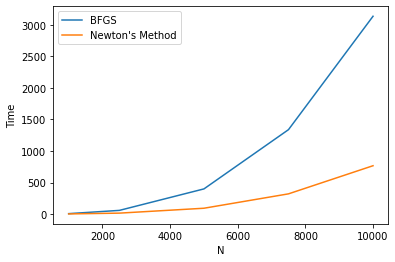

In [ ]:
bfgs_time = [7.11,58.63,398.94,1337.86,3134.79]
newton_time = [2.68,15.18,92.65,320.62,766.33]
n = [1000,2500,5000,7500,10000]

plt.plot(n,bfgs_time,label='BFGS')
plt.plot(n,newton_time,label="Newton's Method")
plt.legend()
plt.xlabel('N')
plt.ylabel('Time')
plt.show()

#Ans 6:

We can observe that BFGS takes more time than Newton's method for all values of n, we can even see that for larger values of n, the gap between runtime increases significantly.